# importing libraries

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay


# importing the datasets of train and test

In [31]:
mobile_data_train = pd.read_csv("train.csv")
mobile_data_test = pd.read_csv("test.csv")

<div style=" font-size:14px; line_height:160%">
showing the top 5 rows of the datasets

In [32]:
mobile_data_train.shape

(2000, 21)

In [33]:
mobile_data_test.shape

(1000, 21)

In [34]:
mobile_data_train.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [35]:
mobile_data_test.head(5)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


<div style=" font-size:18px; line_height:160%">
the last column - "price_range" - is our target

<div style=" font-size:14px; line_height:160%">
making a copy of the train dataset

In [36]:
df = mobile_data_train.copy()

df.shape

(2000, 21)

In [37]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


<div style=" font-size:14px; line_height:160%">
in the cell below we see the analytical information of the dataset

In [38]:
df.describe(include="all")

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


<div style=" font-size:14px; line_height:160%">
to check if the dataset has NaN values and also to see the type of each feature

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

<div style=" font-size:14px; line_height:160%">
We don't have missing values.

<div style=" font-size:14px; line_height:160%">
to see how many unique values are in each column:

In [40]:
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

<div style=" font-size:14px; line_height:160%">
to find out if there are any duplicate rows in the dataset:

In [41]:
df.index.duplicated().sum()

0

<div style=" font-size:14px; line_height:160%">
there is no duplicated rows in the dataset.

<div style=" font-size:14px; line_height:160%">
drawing the correlation diagram:

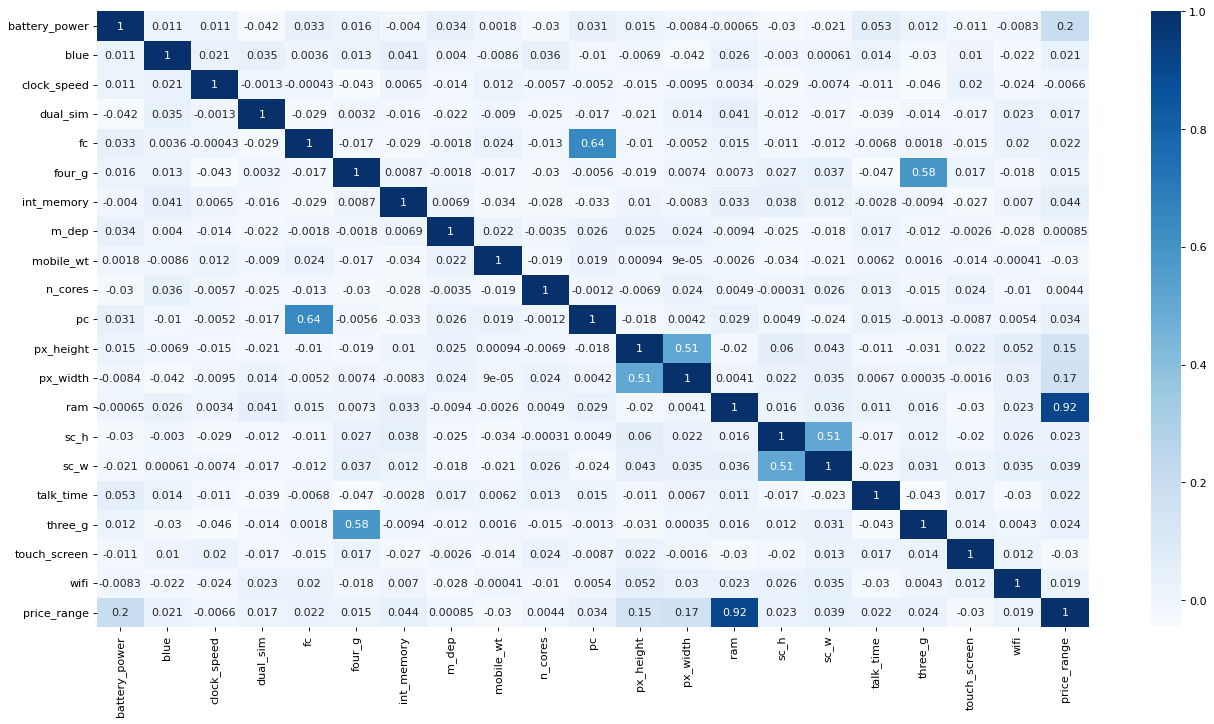

In [42]:
plt.figure(figsize=(20,10), dpi=80)
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Blues)
plt.show()

<div style=" font-size:14px; line_height:160%">
we can say there is no significant correlation between the features.

<div style=" font-size:14px; line_height:160%">
defining a function to count the redundancy of categories in each feature:

In [43]:
def count_plots(df_name, column_name):

    plt.figure(figsize=(20, 8), dpi=90)
    ax = sns.countplot(x=column_name, data=df)
    ax.bar_label(ax.containers[0], fontsize=13)
    plt.xticks(rotation=90, fontsize=12)
    plt.yticks(fontsize=15)
    plt.xlabel(f"\n{column_name}", fontsize=20)
    plt.ylabel("count",fontsize=20)
    plt.title(f"Count of {column_name}", fontsize=30)
    plt.grid()

<div style=" font-size:14px; line_height:160%">
drawing the count plots:

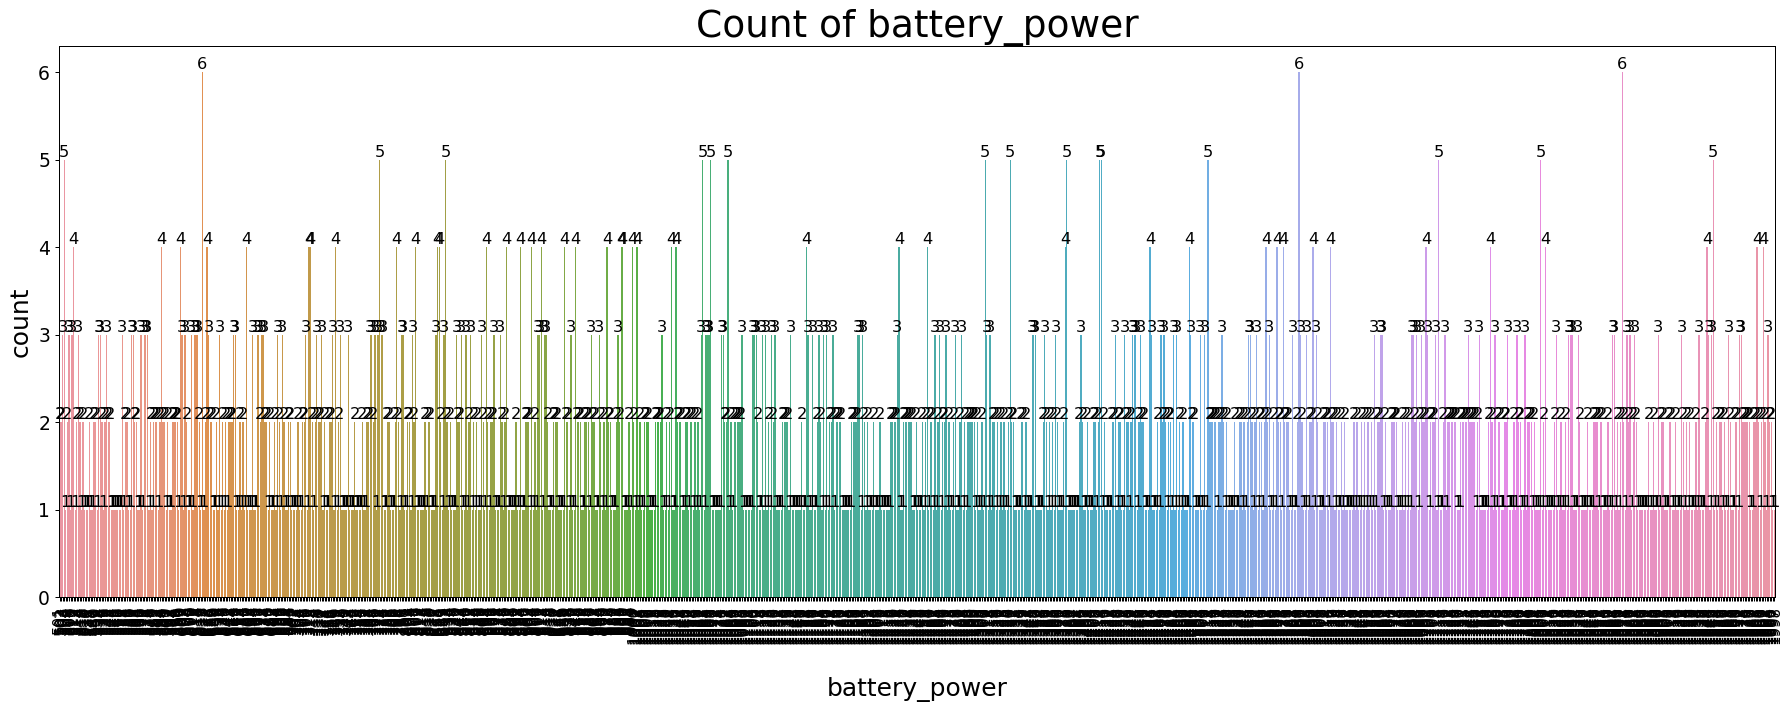

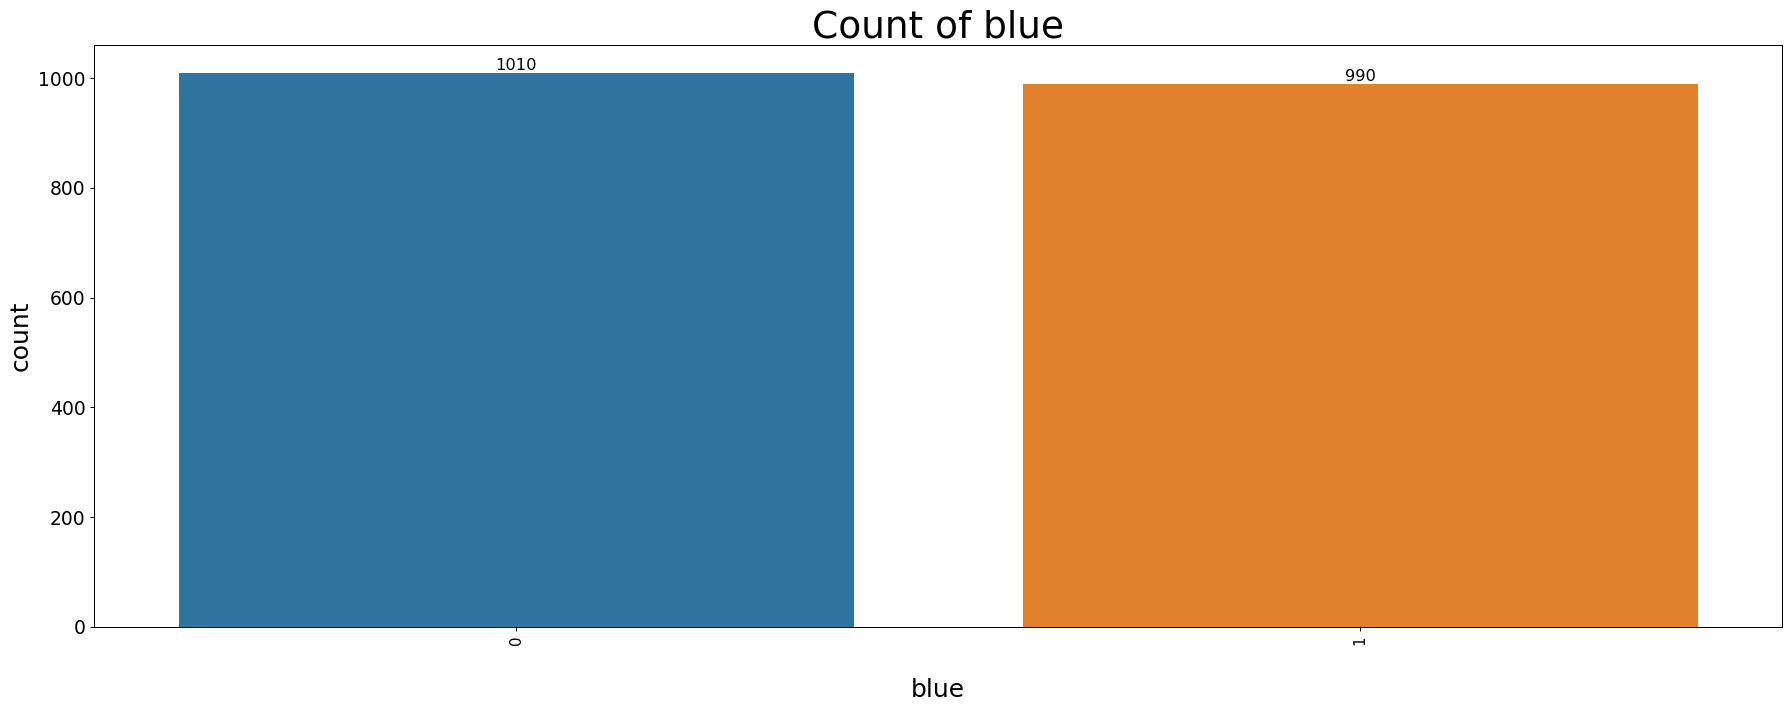

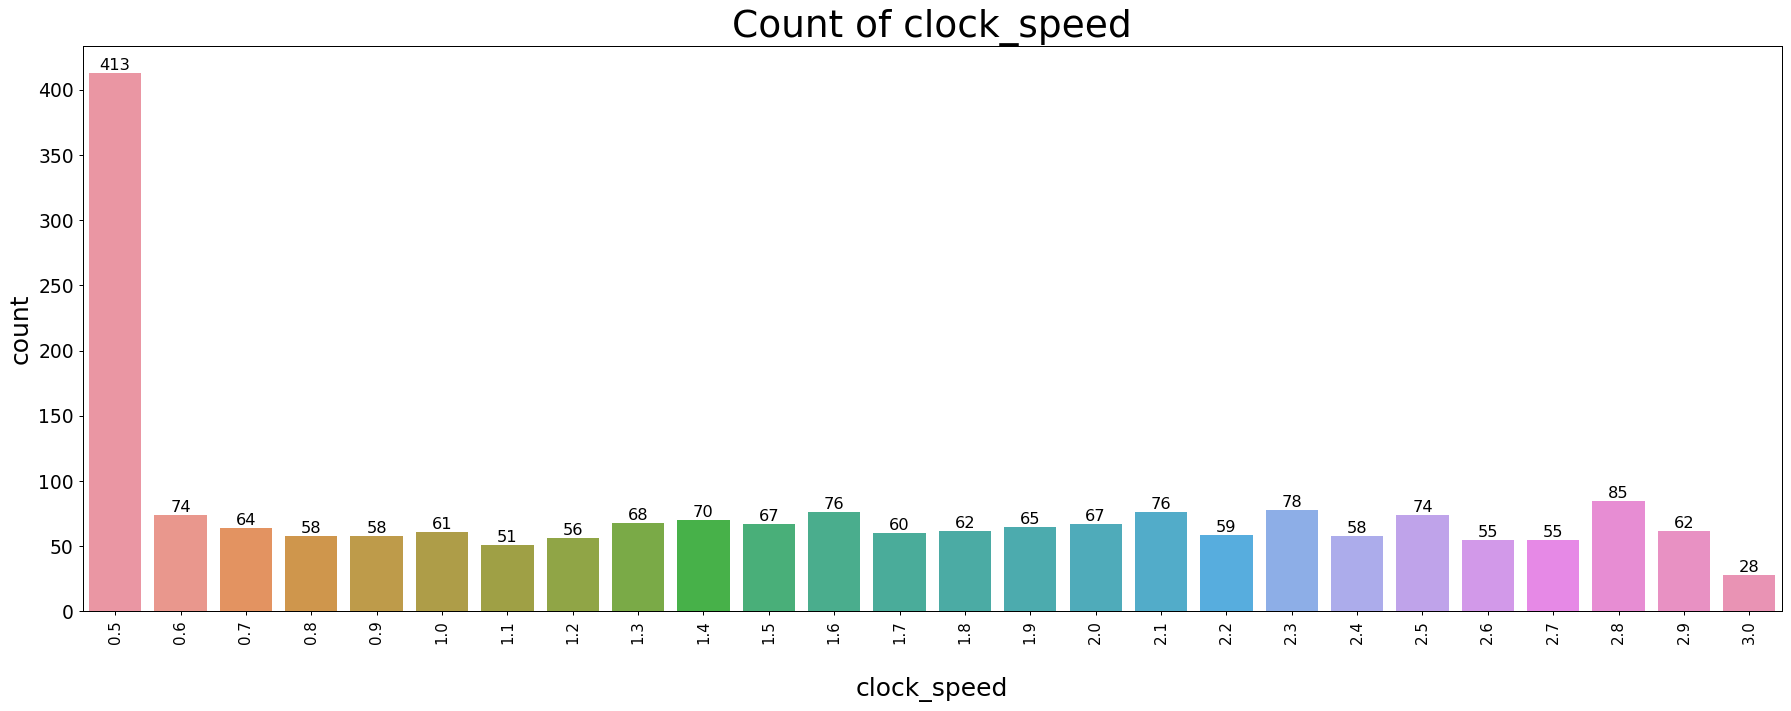

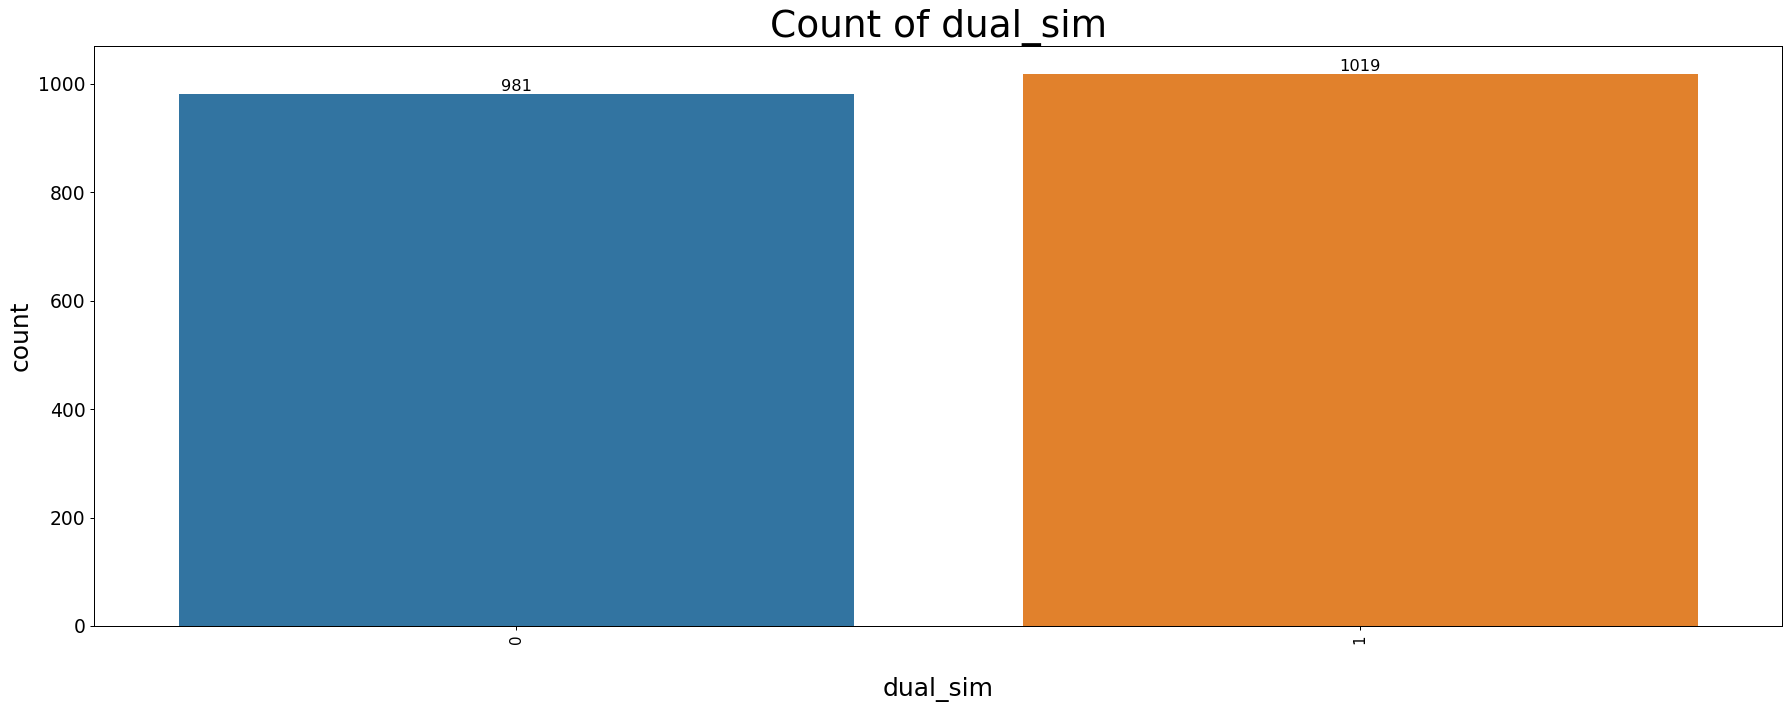

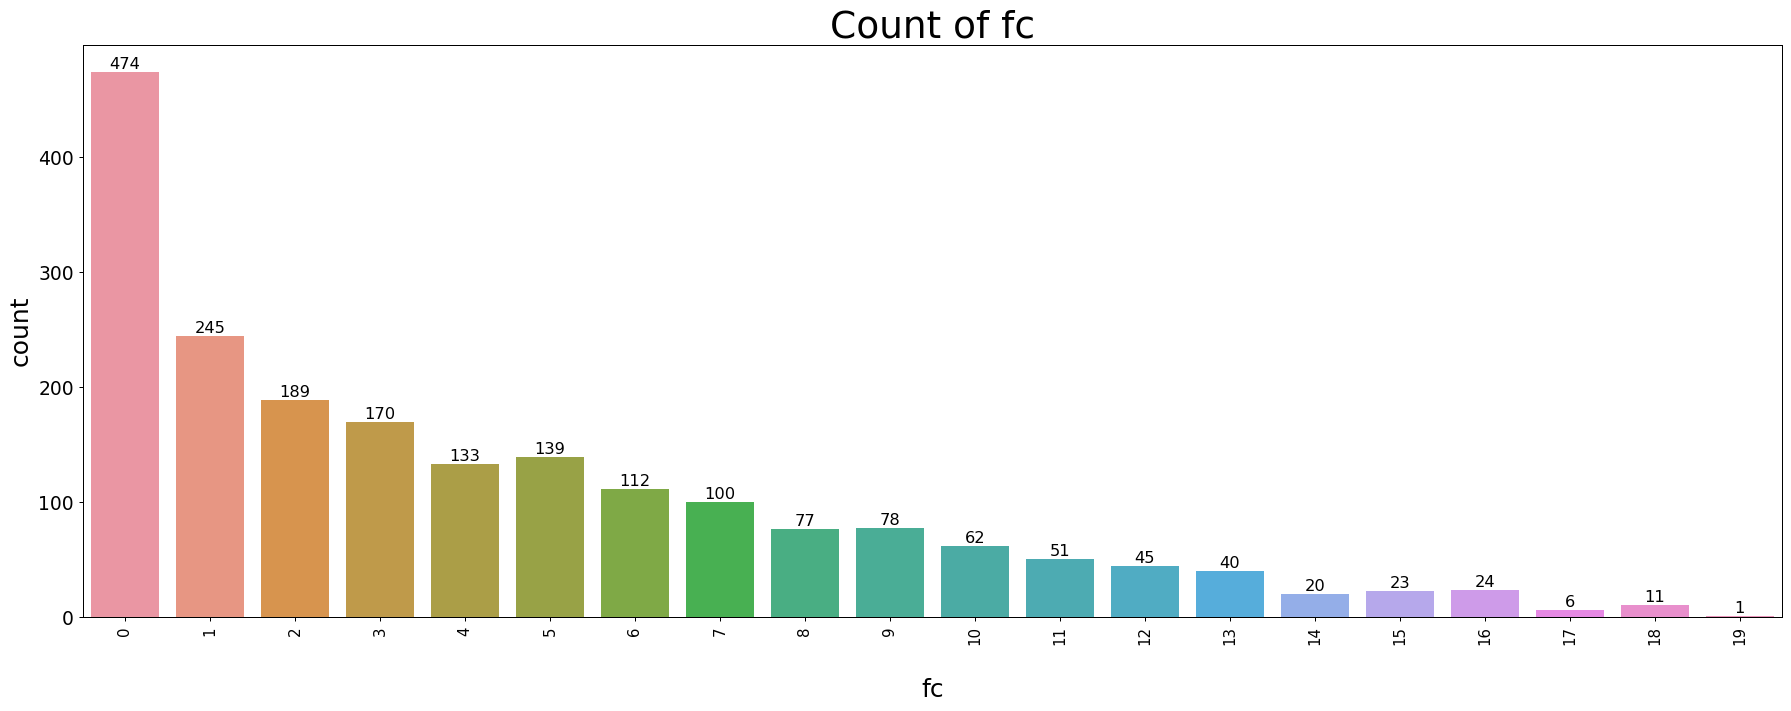

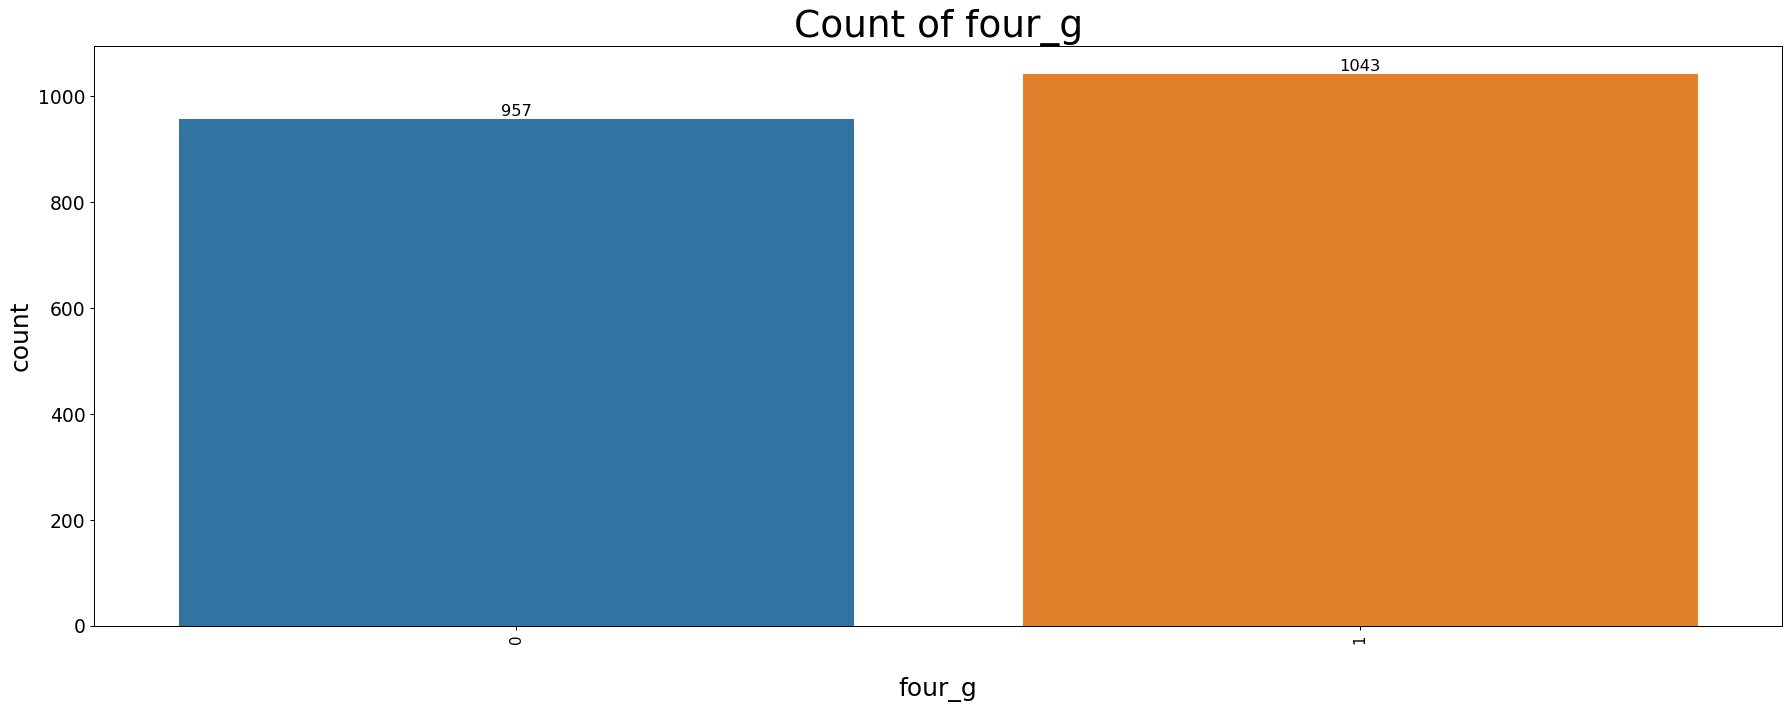

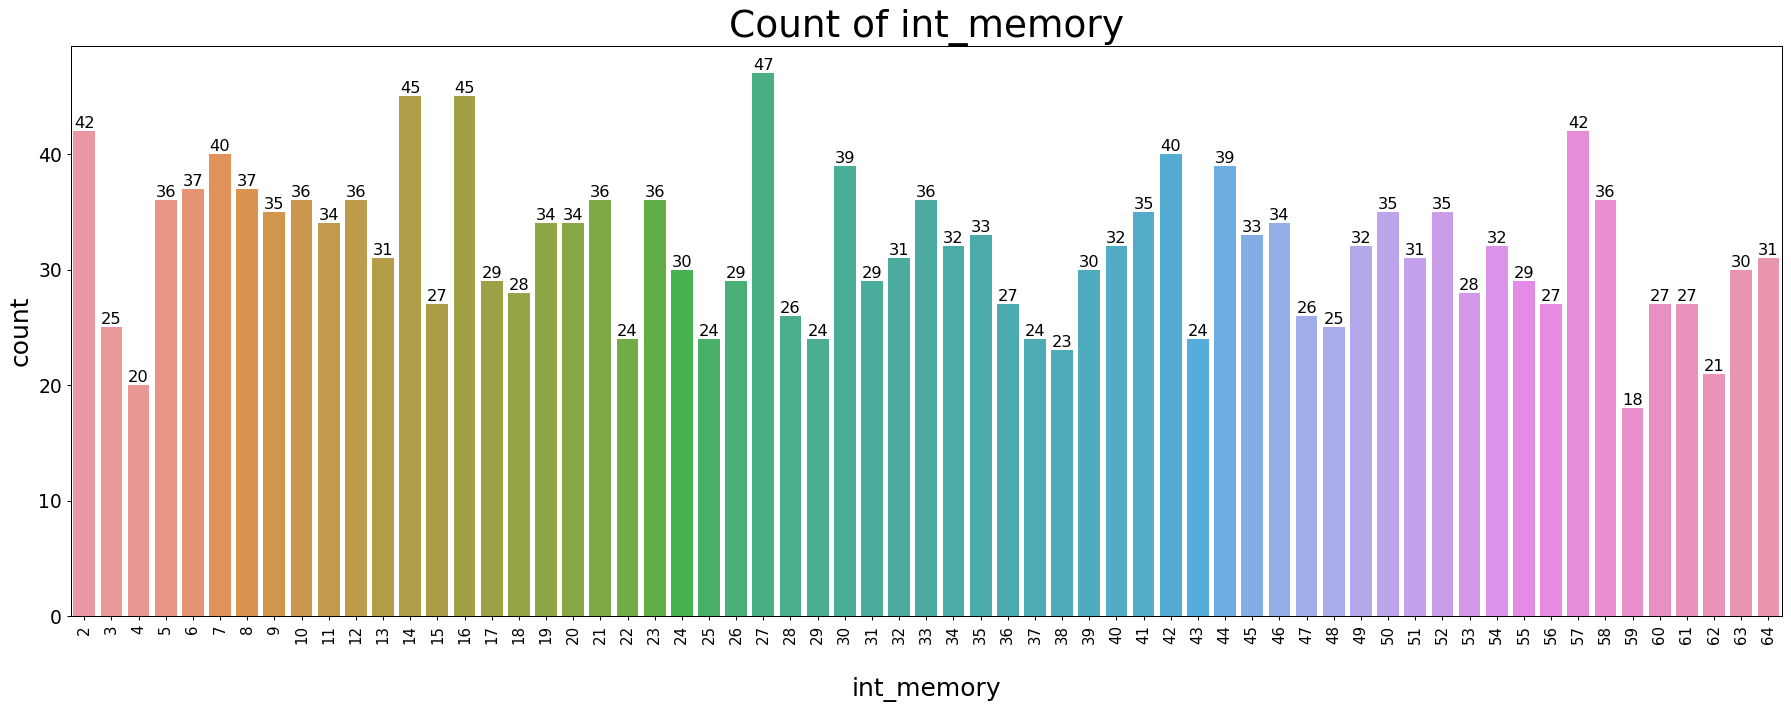

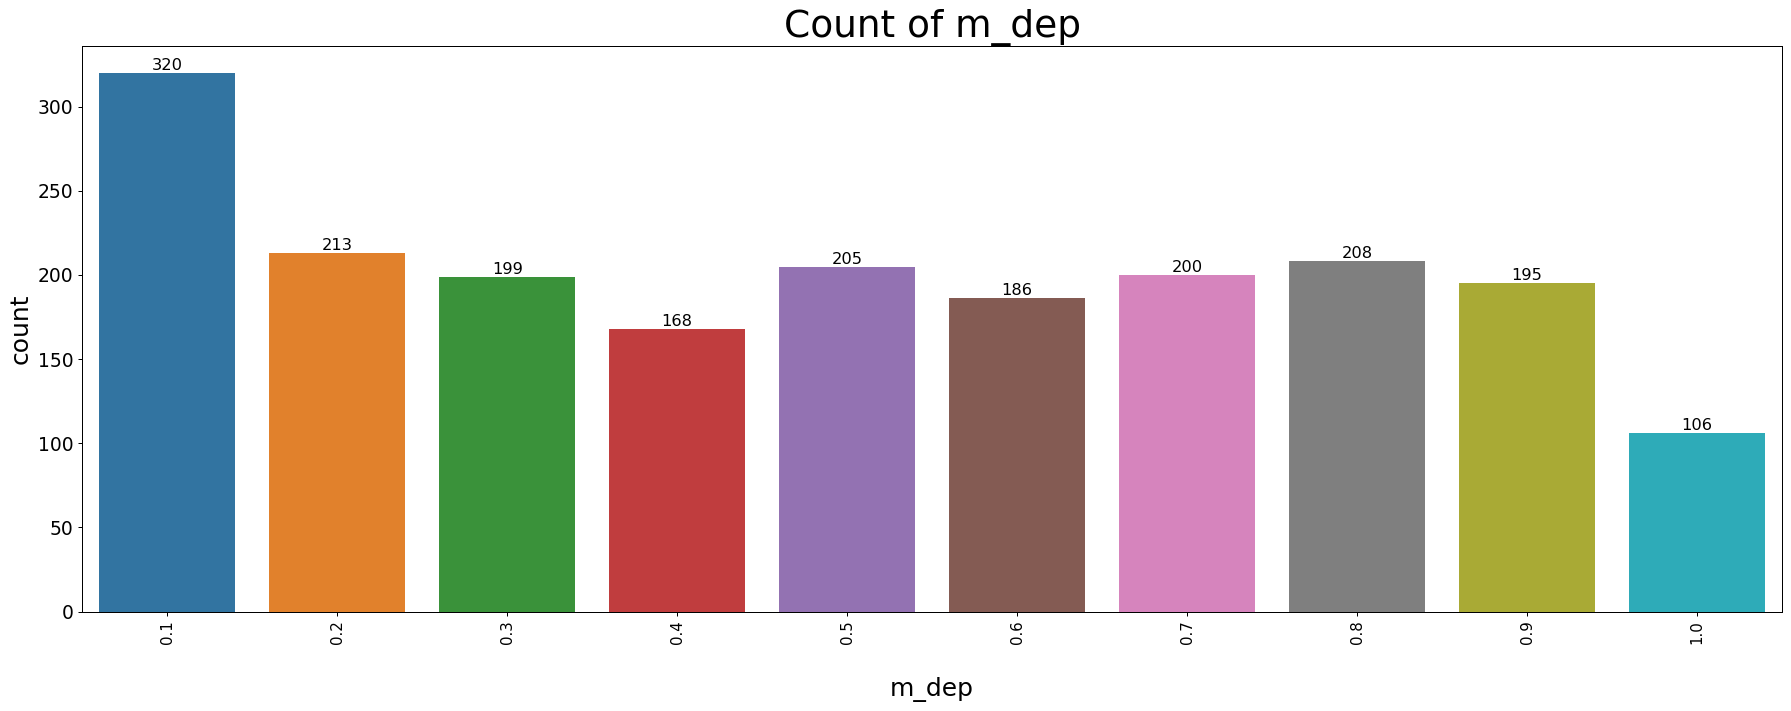

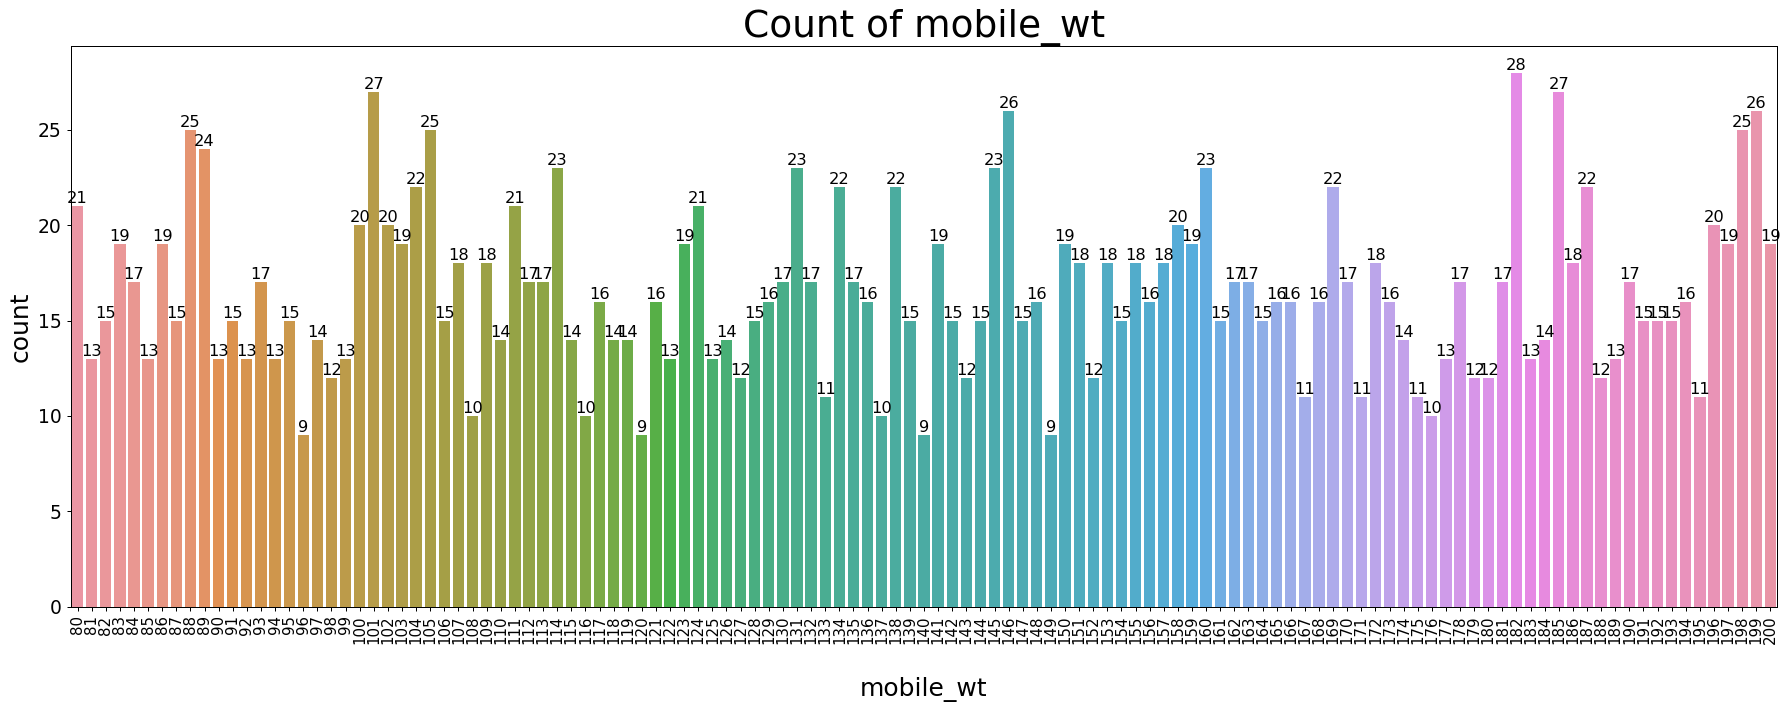

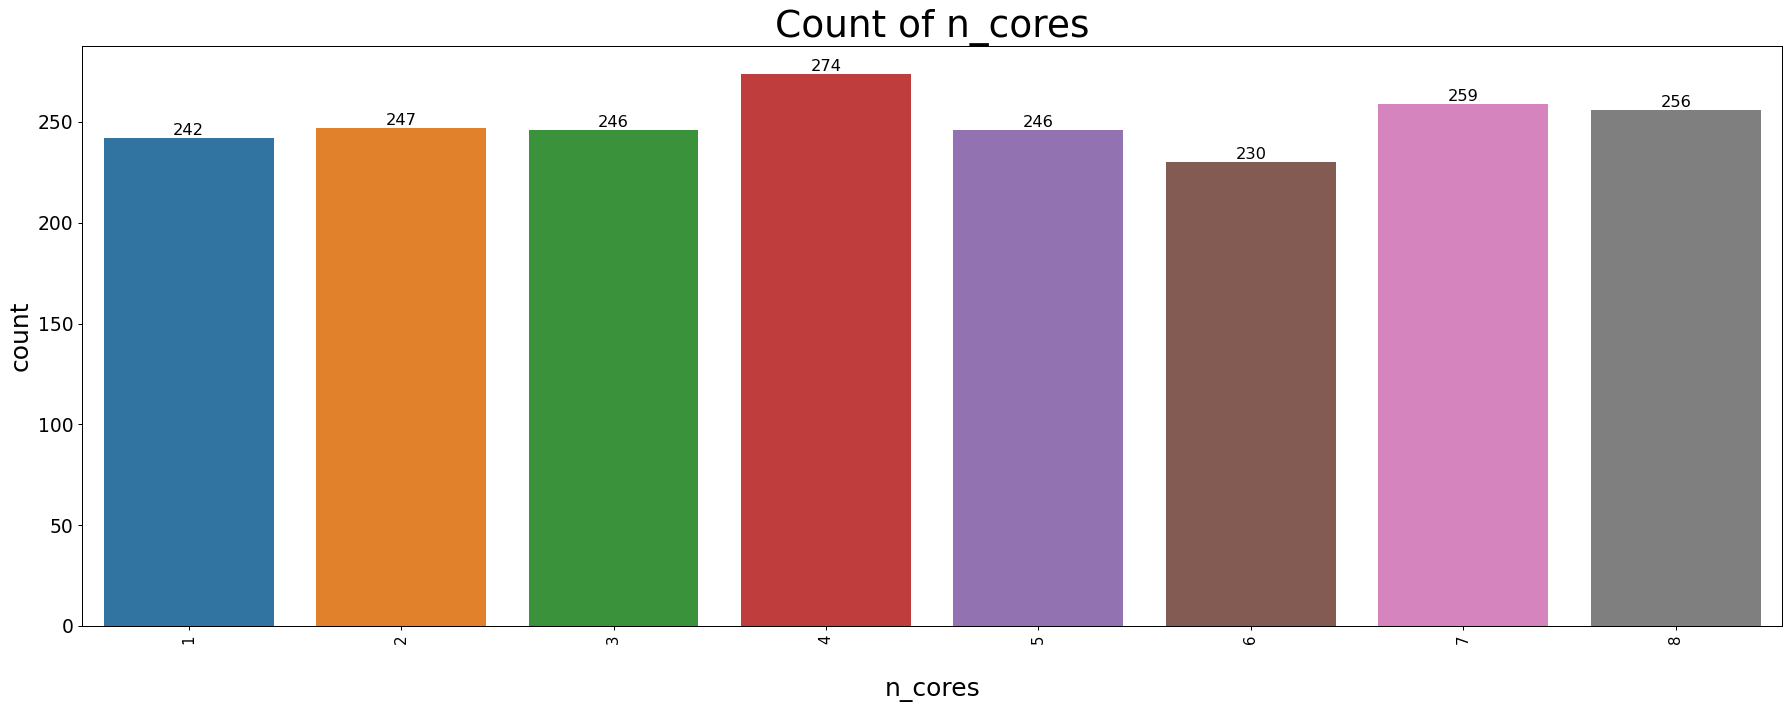

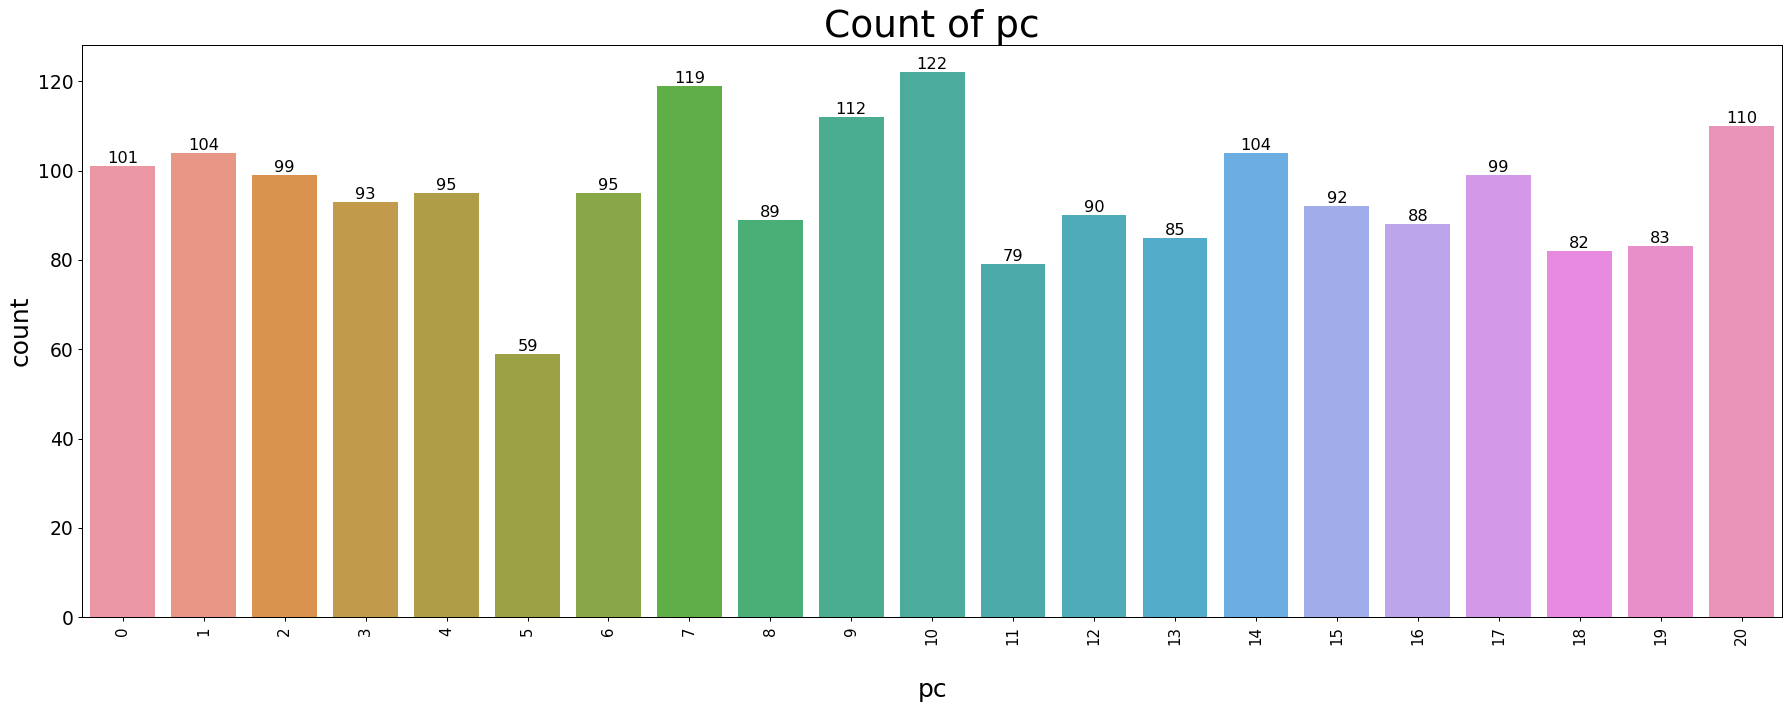

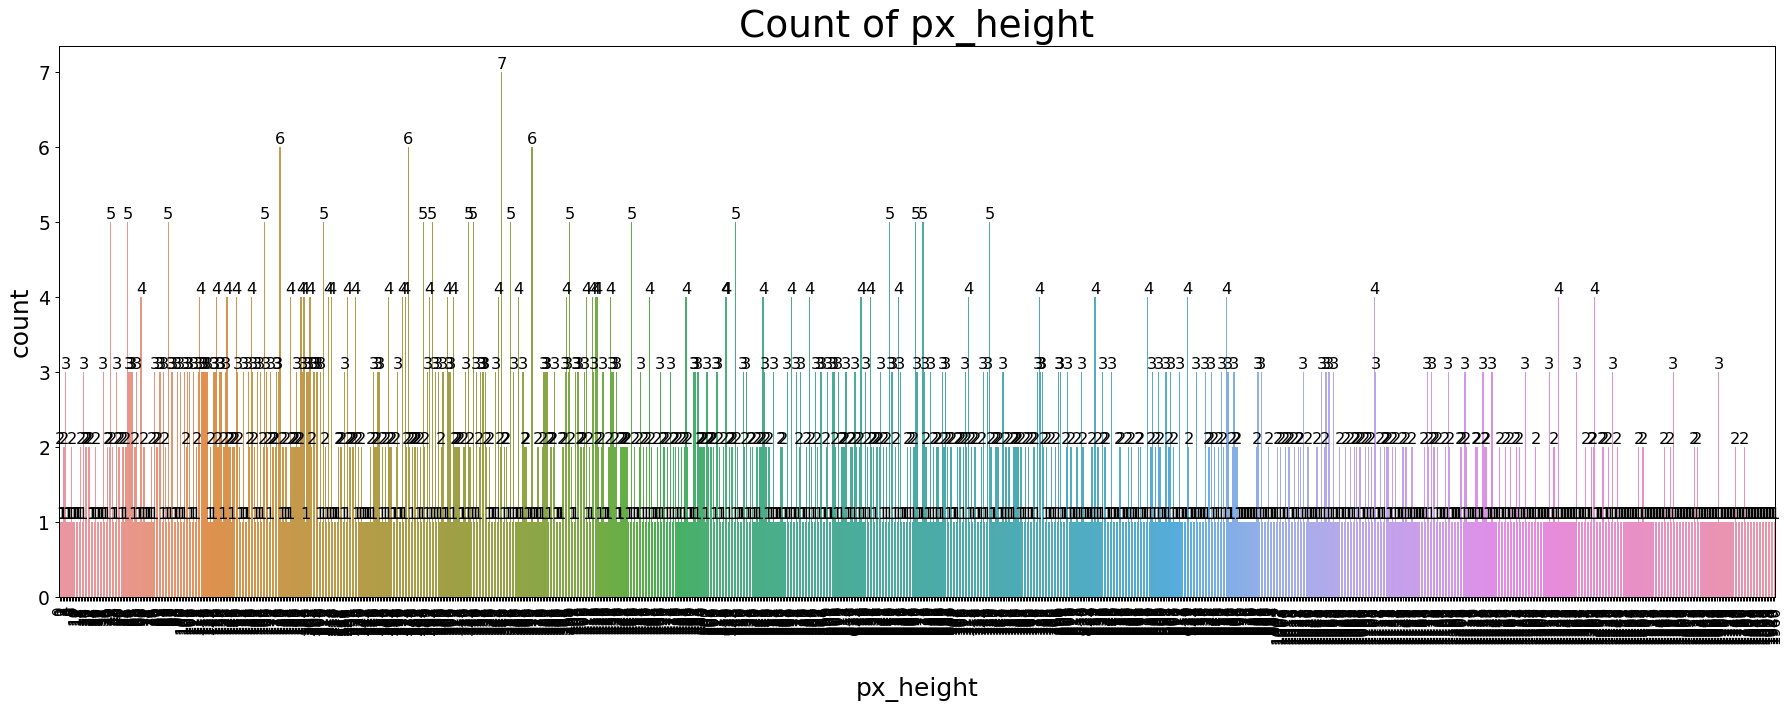

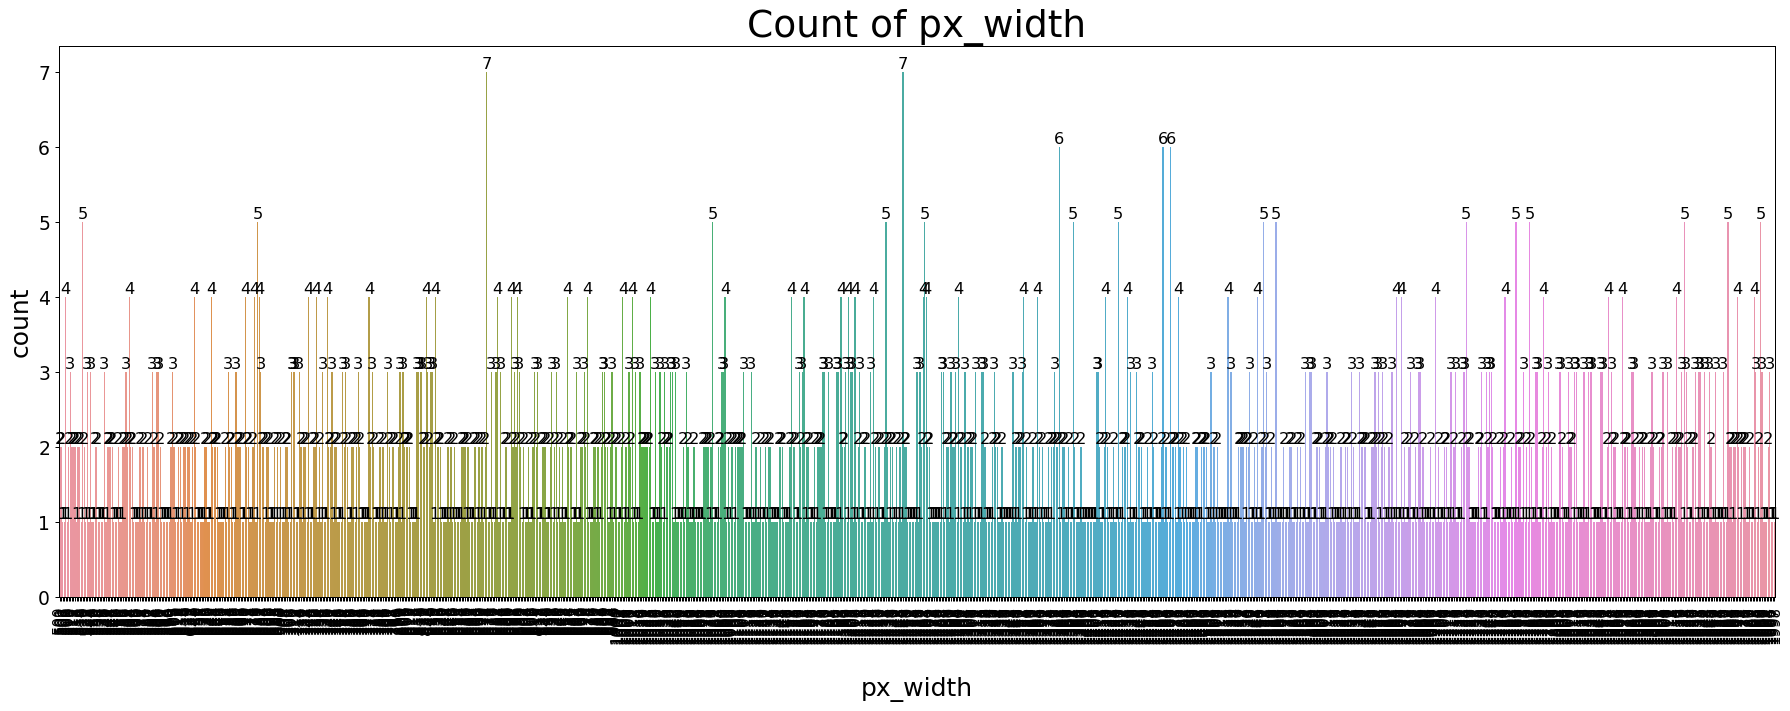

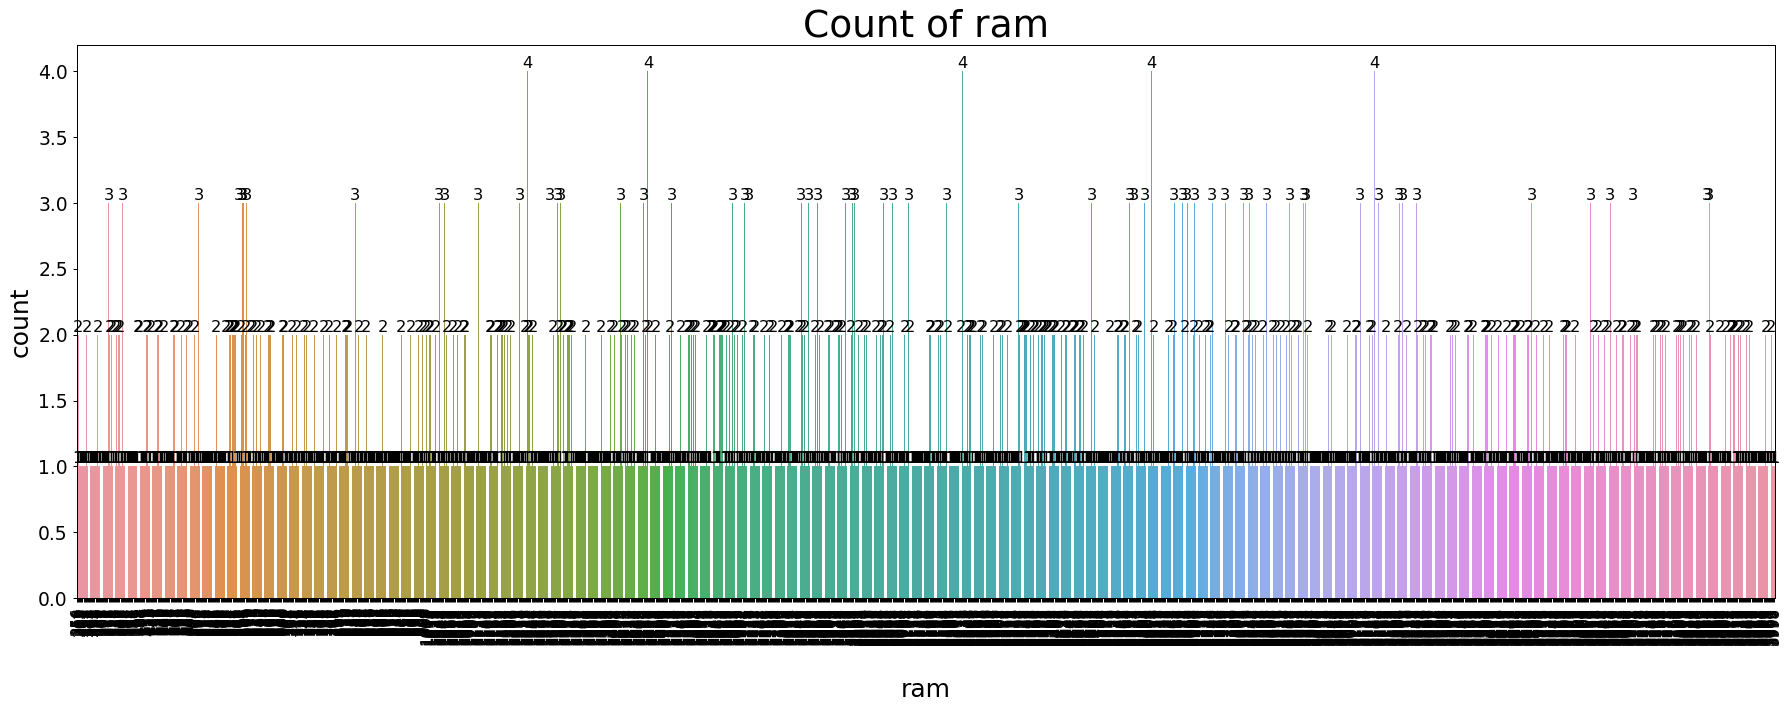

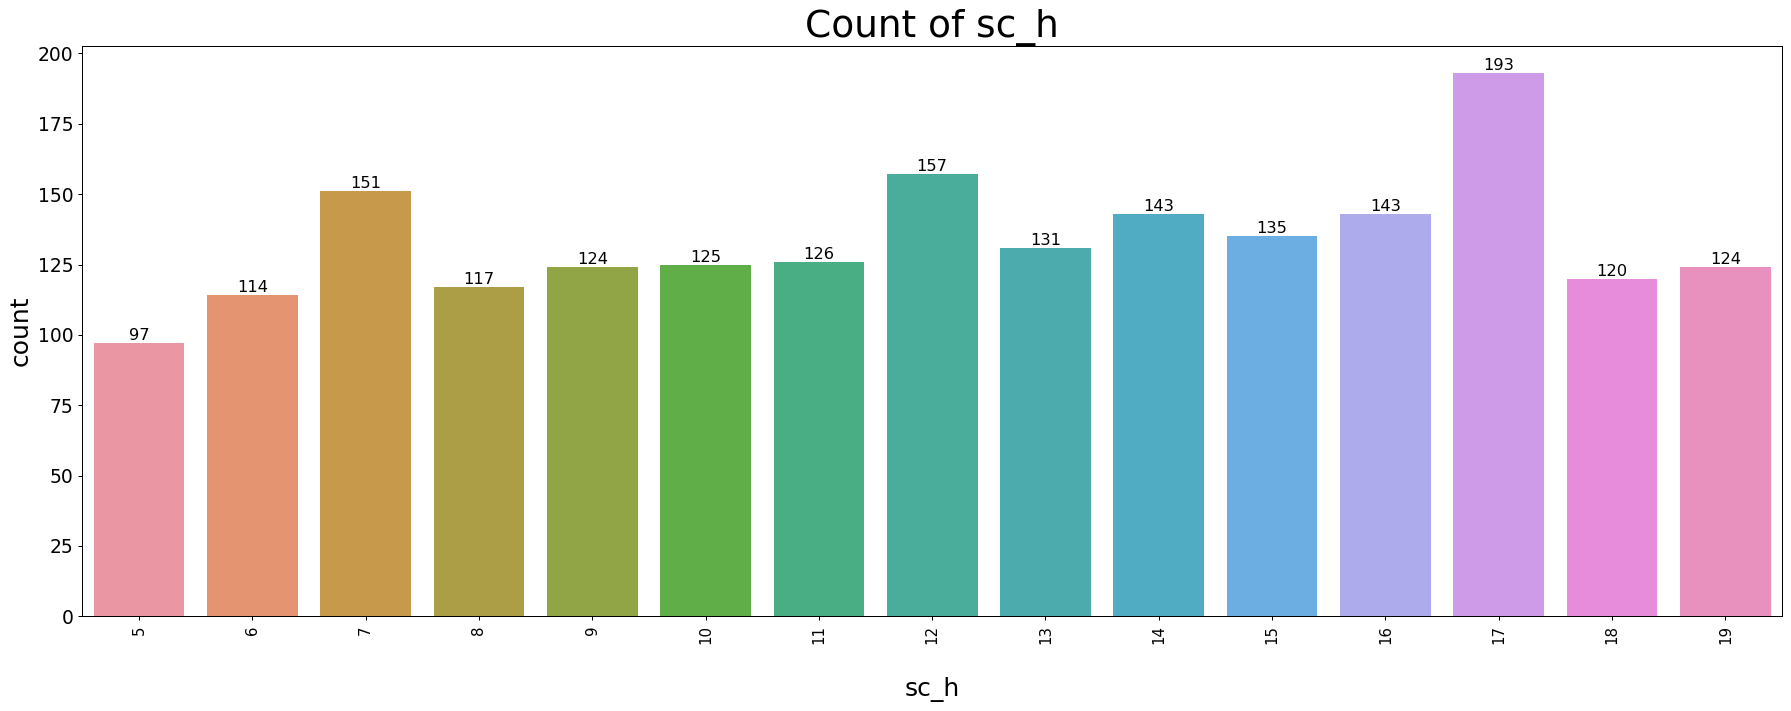

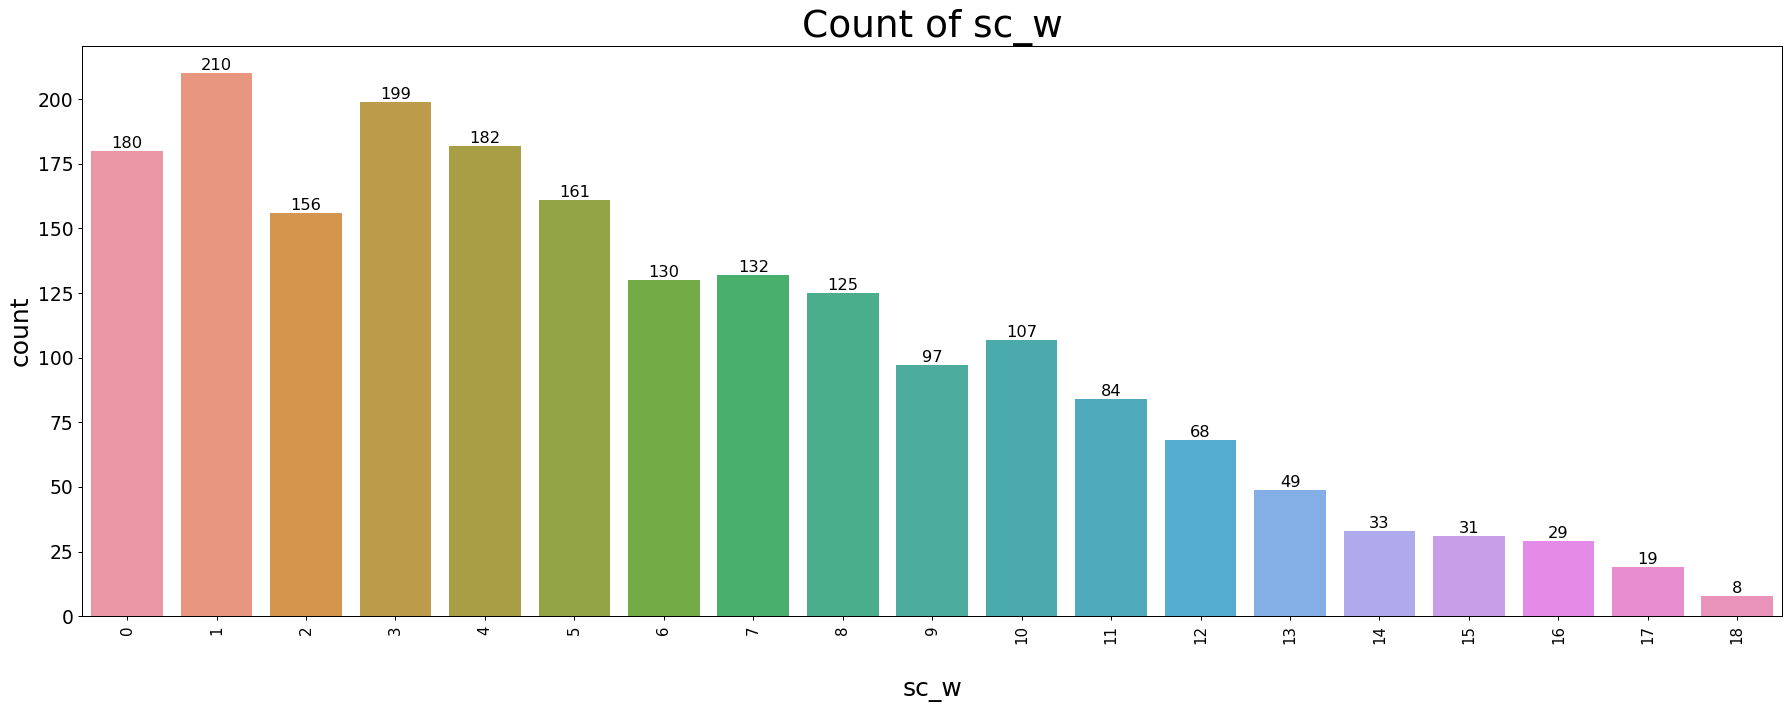

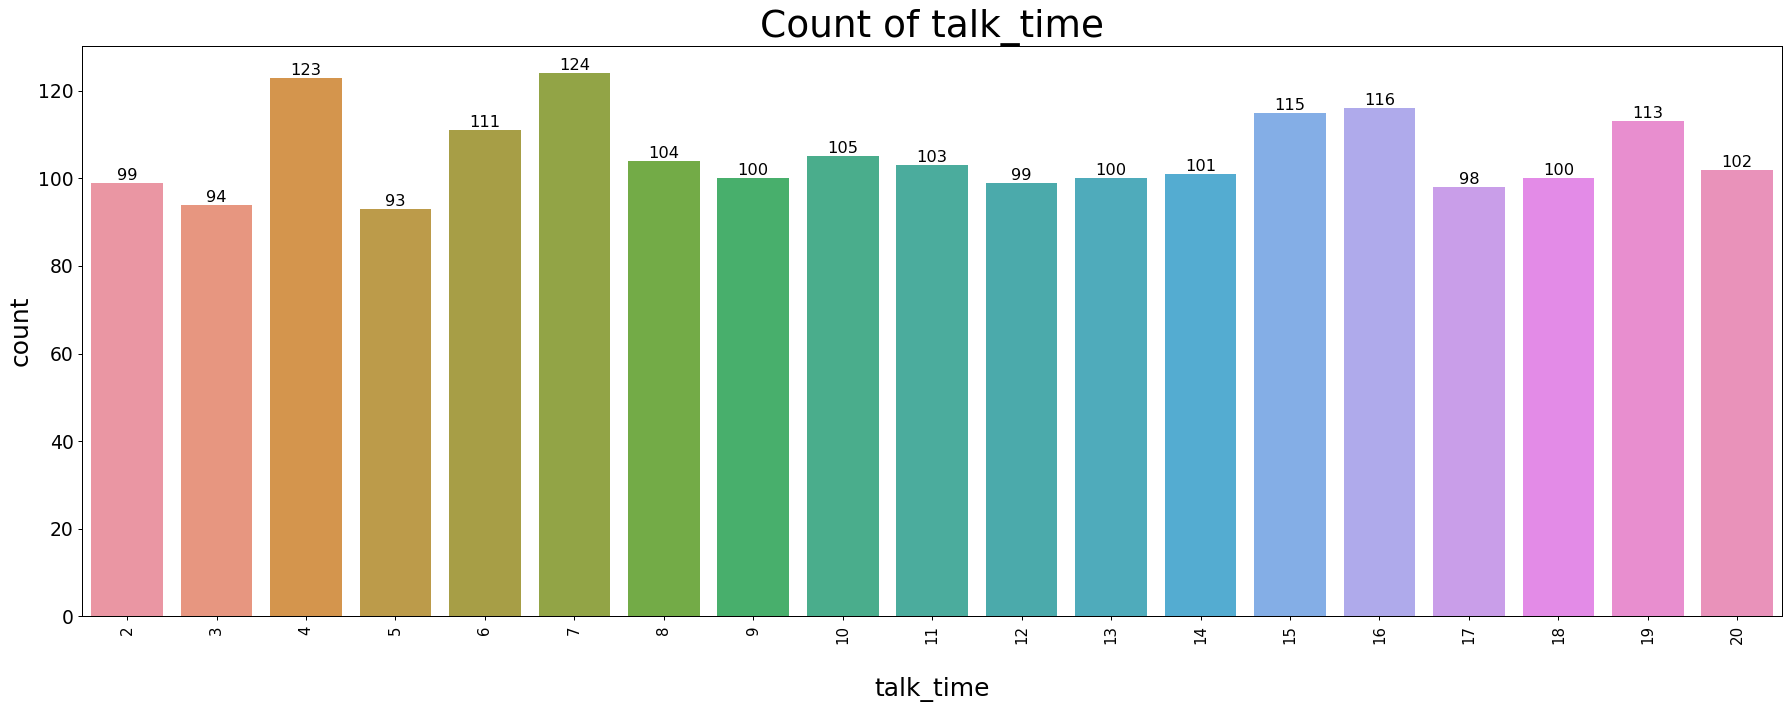

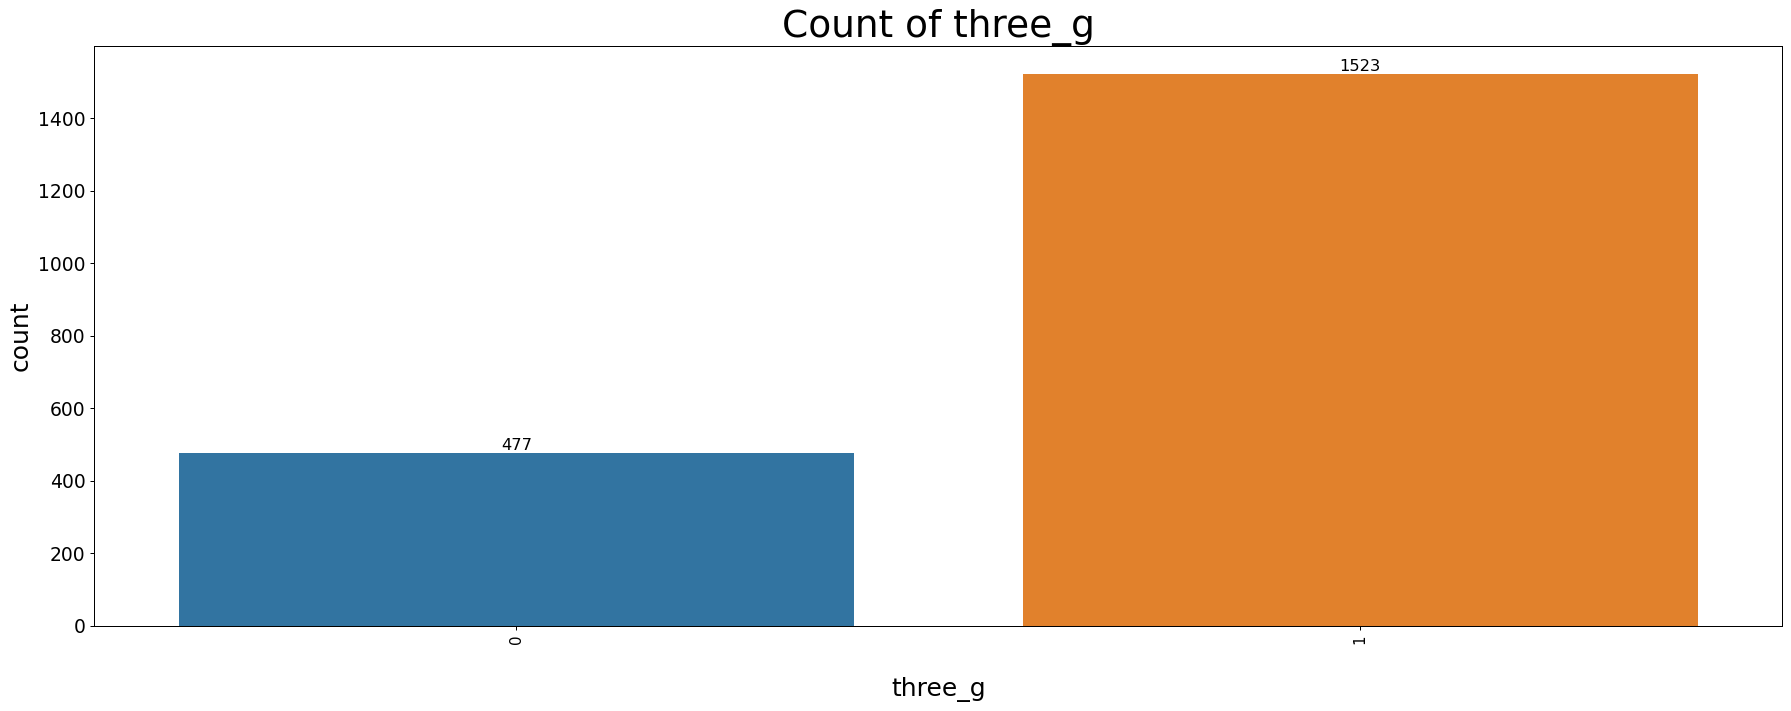

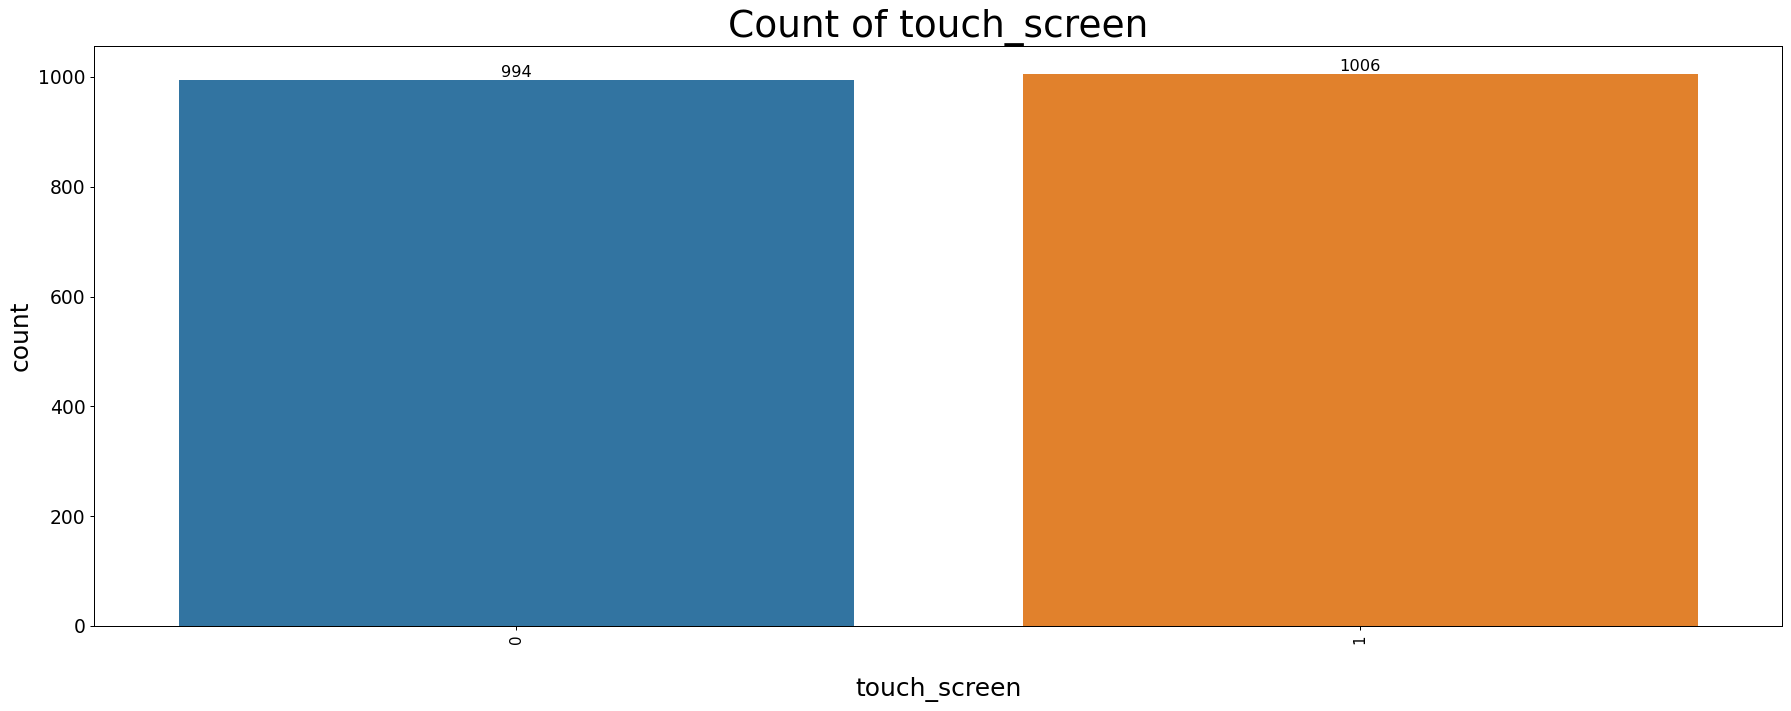

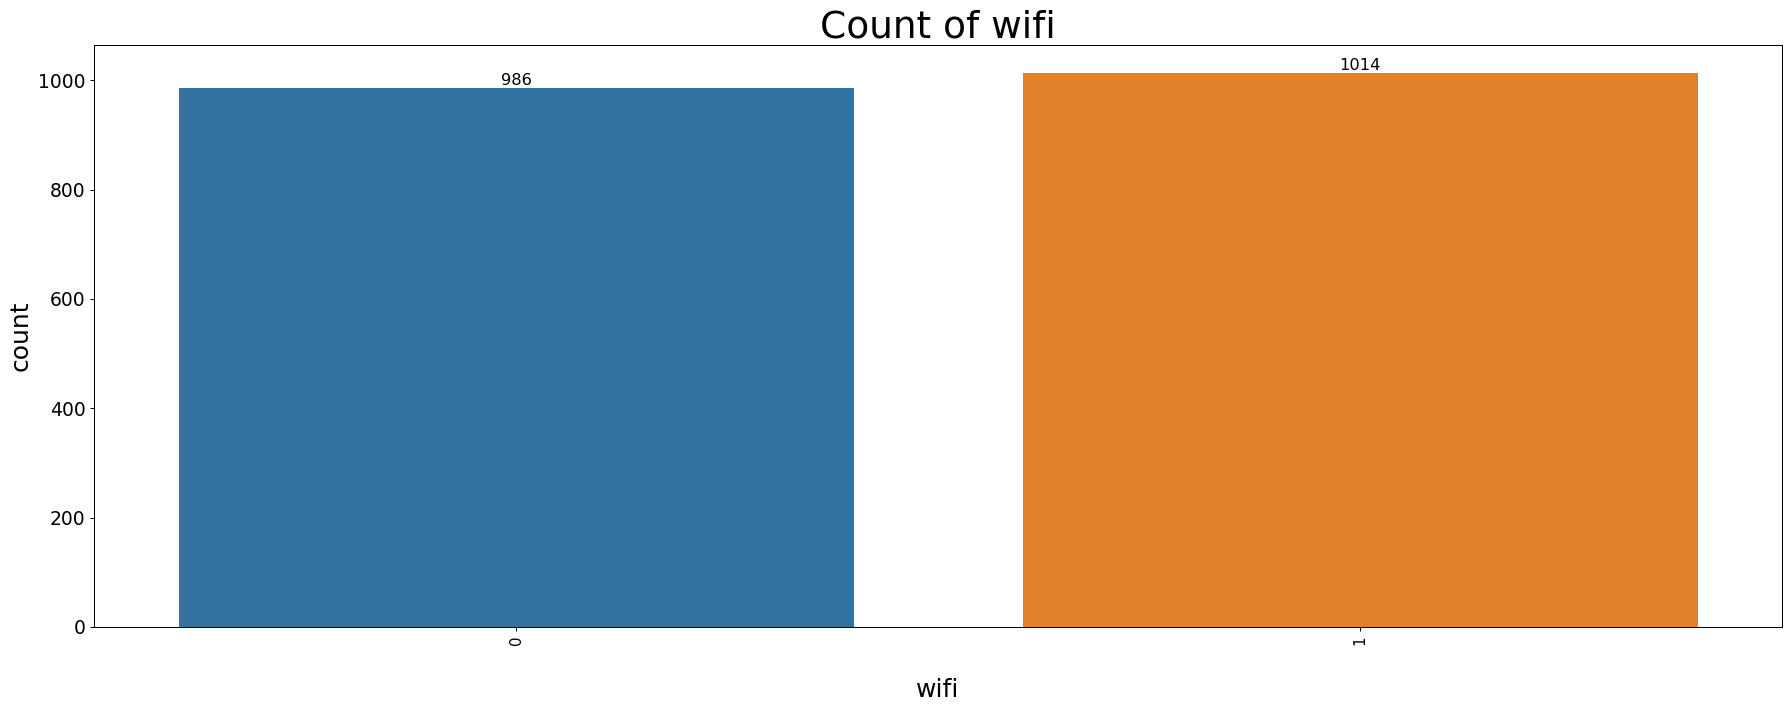

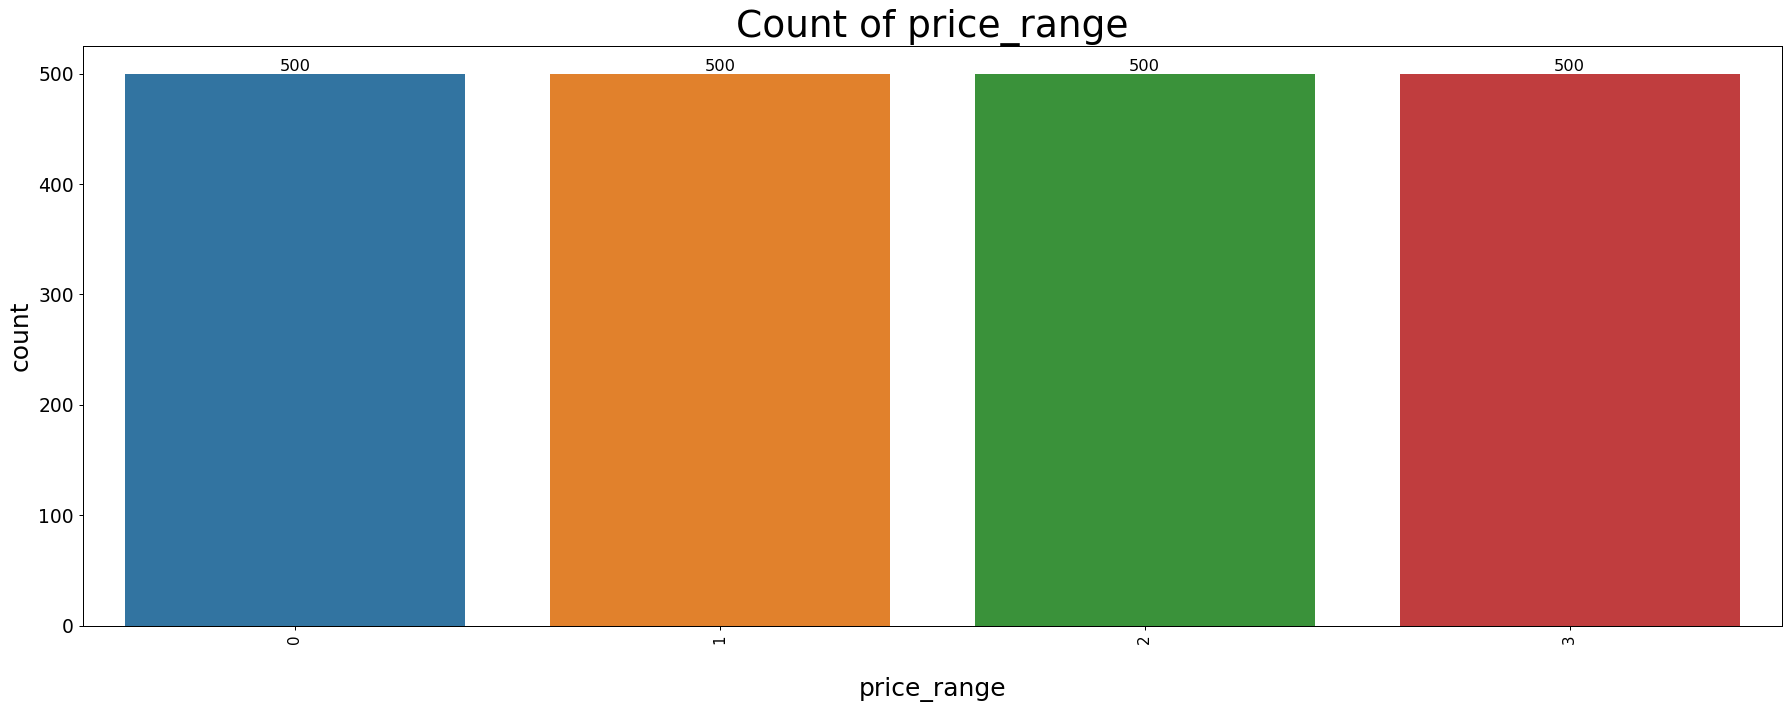

In [44]:
i = 0
j = len(df.columns)-1
while i<=j:
    count_plots(df, df.columns[i])
    plt.grid()
    i += 1
    plt.tight_layout()
    plt.show()

<div style=" font-size:14px; line_height:160%">
count of each category in the target column:

<div style=" font-size:26px; line_height:160%">
Let's setup our models

# Performance Measurement

In [51]:
def perform(y_pred):
    print("Precision : ", precision_score(y_test, y_pred, average = 'micro'))
    print("Recall : ", recall_score(y_test, y_pred, average = 'micro'))
    print("Accuracy : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred, average = 'micro'))
    cm = confusion_matrix(y_test, y_pred)
    print("\n")
    print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
    print(classification_report(y_test, y_pred))
    print("**"*27+"\n")
    
    cm = ConfusionMatrixDisplay(confusion_matrix = cm)
    cm.plot()

# GausianNaiveBayes

In [57]:
X = mobile_data_train.drop("price_range", axis=1).values
y = mobile_data_train["price_range"].values
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

Precision :  0.7575
Recall :  0.7575
Accuracy :  0.7575
F1 Score :  0.7575

 [[79 13  0  0]
 [11 66 19  0]
 [ 0 21 72 13]
 [ 0  1 19 86]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        92
           1       0.65      0.69      0.67        96
           2       0.65      0.68      0.67       106
           3       0.87      0.81      0.84       106

    accuracy                           0.76       400
   macro avg       0.76      0.76      0.76       400
weighted avg       0.76      0.76      0.76       400

******************************************************



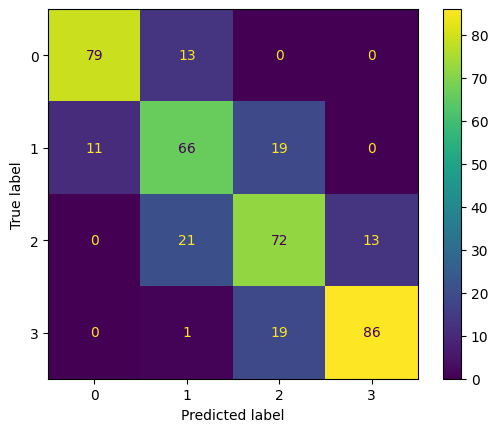

In [58]:
model_nb = GaussianNB()
model_nb.fit(x_train, y_train)
y_pred_nb = model_nb.predict(x_test)
perform(y_pred_nb)

# Random Forest

In [63]:
# Create a logistic regression classifier
rf = RandomForestClassifier()

# Define the parameter grid to search over
param_grid = {'n_estimators':range(100,500,50),'criterion':['gini', 'entropy', 'log_loss']}

# Create the GridSearchCV object
grid_search = GridSearchCV(rf, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(x_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(x_test, y_test)
print("Test accuracy:", test_accuracy)


Best parameters: {'criterion': 'entropy', 'n_estimators': 450}
Best score: 0.8931250000000001
Test accuracy: 0.8875


In [ ]:
model_rf = RandomForestClassifier(n_estimators=450,criterion='entropy')
model_rf.fit(x_train, y_train)
y_pred_rf = model_rf.predict(x_test)
perform(y_pred_rf)

# Support Vector Classifier

In [69]:
# Create a logistic regression classifier
svm = SVC()

# Define the parameter grid to search over
param_grid = {'C':[0.1,0.5,1.0,],'kernel':['linear','rbf','poly','sigmoid']}

# Create the GridSearchCV object
grid_search = GridSearchCV(svm, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(x_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(x_test, y_test)
print("Test accuracy:", test_accuracy)

Best parameters: {'C': 0.1, 'kernel': 'linear'}
Best score: 0.971875
Test accuracy: 0.975


Precision :  0.975
Recall :  0.975
Accuracy :  0.975
F1 Score :  0.975

 [[ 90   2   0   0]
 [  2  93   1   0]
 [  0   1 104   1]
 [  0   0   3 103]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        92
           1       0.97      0.97      0.97        96
           2       0.96      0.98      0.97       106
           3       0.99      0.97      0.98       106

    accuracy                           0.97       400
   macro avg       0.98      0.97      0.97       400
weighted avg       0.98      0.97      0.98       400

******************************************************



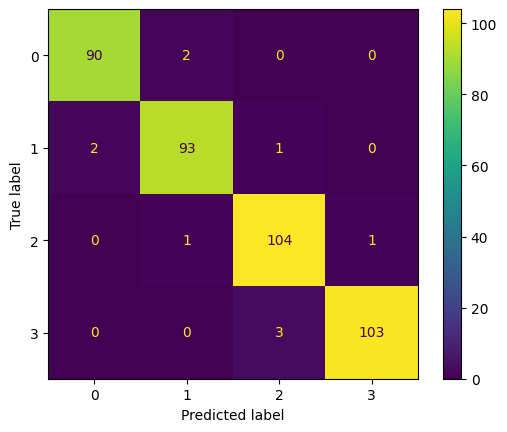

In [68]:
model_svc = SVC(C=0.1,kernel='linear')
model_svc.fit(x_train, y_train)
y_pred_svc = model_svc.predict(x_test)
perform(y_pred_svc)

# Knn

Text(0, 0.5, 'Accuracy')

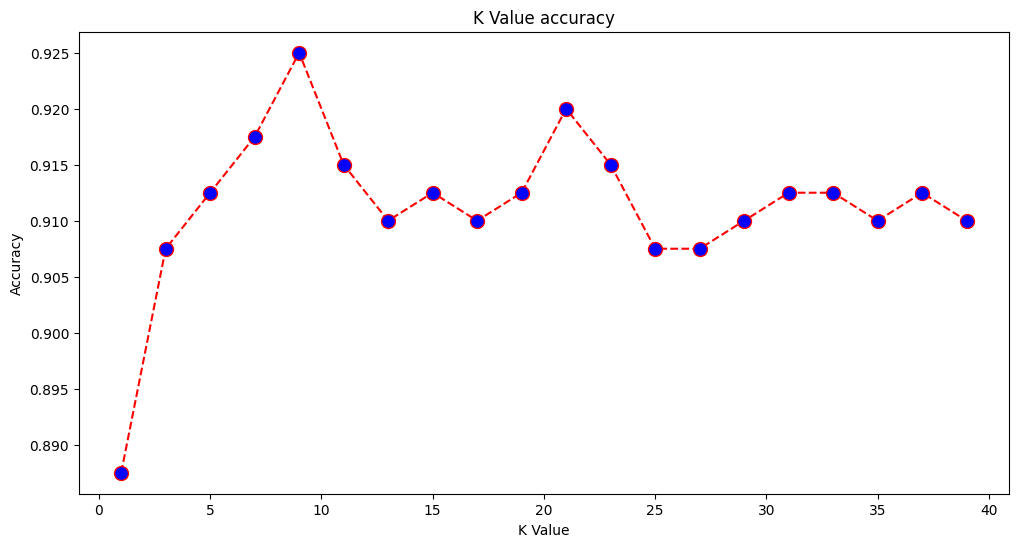

In [73]:
error = []

# Calculating MAE error for K values between 1 and 39
for i in range(1, 40,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    accuracy = accuracy_score(y_test, pred_i)
    error.append(accuracy)
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40,2), error, color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
         
plt.title('K Value accuracy')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

Precision :  0.925
Recall :  0.925
Accuracy :  0.925
F1 Score :  0.925

 [[89  3  0  0]
 [ 3 91  2  0]
 [ 0  7 96  3]
 [ 0  0 12 94]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        92
           1       0.90      0.95      0.92        96
           2       0.87      0.91      0.89       106
           3       0.97      0.89      0.93       106

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400

******************************************************



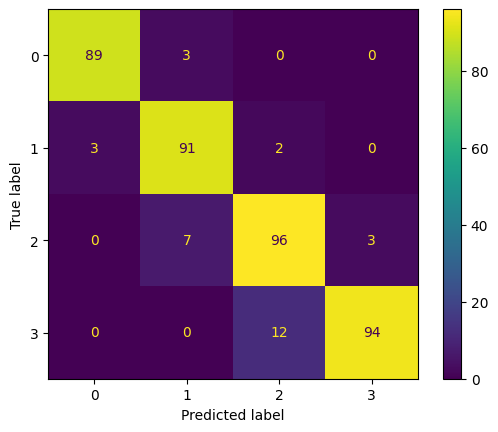

In [77]:
model_knn = KNeighborsClassifier(n_neighbors=9)
model_knn.fit(x_train, y_train)
y_pred_knn = model_knn.predict(x_test)
perform(y_pred_knn)

# AdaBoostClassifier

In [86]:


# Define the base estimator
base_estimator = DecisionTreeClassifier()

# Create the Adaboost classifier
adaboost = AdaBoostClassifier(estimator=base_estimator)

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of weak classifiers
    'learning_rate': [0.1, 0.5, 1.0],  # Learning rate
}

# Perform grid search using cross-validation
grid_search = GridSearchCV(adaboost, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Print the best parameters and score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


Best Parameters:  {'learning_rate': 0.5, 'n_estimators': 100}
Best Score:  0.8331249999999999


Precision :  0.8375
Recall :  0.8375
Accuracy :  0.8375
F1 Score :  0.8375

 [[82 10  0  0]
 [ 9 81  6  0]
 [ 0 17 79 10]
 [ 0  0 13 93]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.90      0.89      0.90        92
           1       0.75      0.84      0.79        96
           2       0.81      0.75      0.77       106
           3       0.90      0.88      0.89       106

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400

******************************************************



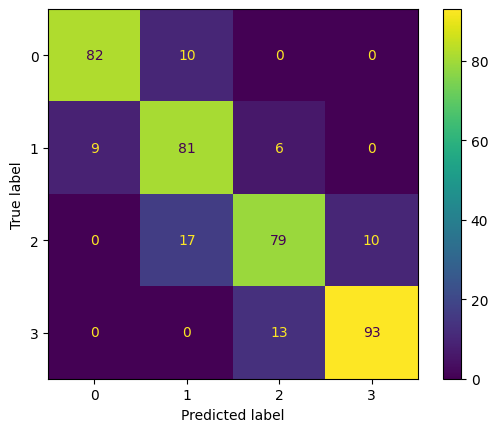

In [87]:
model_ada = AdaBoostClassifier(estimator=base_estimator,learning_rate= 0.5, n_estimators = 100)
model_ada.fit(x_train, y_train)
y_pred_ada = model_ada.predict(x_test)
perform(y_pred_ada)

# Comparison

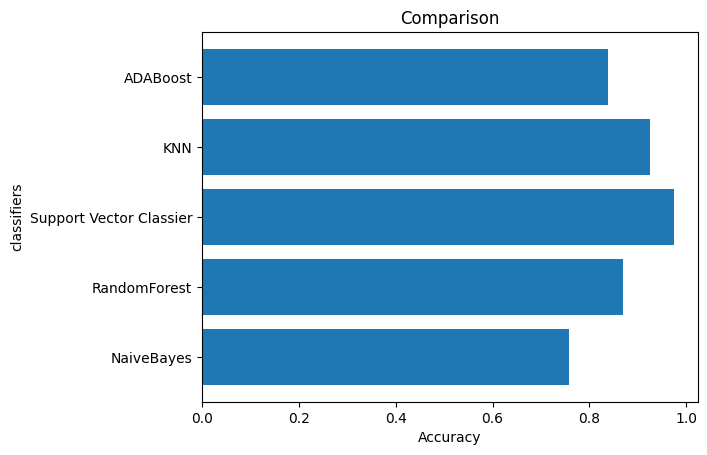

In [88]:
pred=[y_pred_nb,y_pred_rf,y_pred_svc,y_pred_knn,y_pred_ada]
acc=[]
classifiers=["NaiveBayes","RandomForest","Support Vector Classier","KNN","ADABoost"]
for i in pred:
    temp=accuracy_score(y_test, i)
    acc.append(temp)

plt.barh(classifiers, acc)

# Add labels and title
plt.ylabel('classifiers')
plt.xlabel('Accuracy')
plt.title('Comparison')
plt.show()
